In [1]:
#pip install scrapy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("extract_saree.csv")
df.head()

,stars,comment
0,3.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Material i...
1,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n The saree ...
2,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Excellent ...
3,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Very good ...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I like thi...


# Text preprocessing

In [4]:
# removing all special characters
import re
df['comment']=df['comment'].apply(lambda x:re.sub('[^A-Za-z ]',"",str(x)))

In [5]:
df.head()

,stars,comment
0,3.0 out of 5 stars,Material is good but the peacock pri...
1,5.0 out of 5 stars,The saree has repeatedly folded Tho...
2,5.0 out of 5 stars,Excellent saree at this price Liked ...
3,5.0 out of 5 stars,Very good Saree will reorder Stron...
4,5.0 out of 5 stars,I like this very much really its ama...


In [6]:
# converting all reviews to lower case
df['comment']=df['comment'].apply(lambda x:x.lower())

In [7]:
df.head()

,stars,comment
0,3.0 out of 5 stars,material is good but the peacock pri...
1,5.0 out of 5 stars,the saree has repeatedly folded tho...
2,5.0 out of 5 stars,excellent saree at this price liked ...
3,5.0 out of 5 stars,very good saree will reorder stron...
4,5.0 out of 5 stars,i like this very much really its ama...


In [8]:
# converting the reviews to list form
df['comment']=df['comment'].apply(lambda x: x.split())

In [9]:
df.head()

,stars,comment
0,3.0 out of 5 stars,"[material, is, good, but, the, peacock, print,..."
1,5.0 out of 5 stars,"[the, saree, has, repeatedly, folded, though, ..."
2,5.0 out of 5 stars,"[excellent, saree, at, this, price, liked, the..."
3,5.0 out of 5 stars,"[very, good, saree, will, reorder, strongly, r..."
4,5.0 out of 5 stars,"[i, like, this, very, much, really, its, amazi..."


In [10]:
stop=open("stop.txt")
stopwords = stop.read()
stopwords=stopwords.splitlines()
stopwords

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [11]:
#removing the stopwords
df['comment']=df['comment'].apply(lambda x: [word for word in x if word not in set(stopwords)])

In [12]:
df.head()

,stars,comment
0,3.0 out of 5 stars,"[material, good, peacock, print, fades, washed]"
1,5.0 out of 5 stars,"[saree, repeatedly, folded, product, price]"
2,5.0 out of 5 stars,"[excellent, saree, price, colour, design, mate..."
3,5.0 out of 5 stars,"[good, saree, reorder, strongly, recommend]"
4,5.0 out of 5 stars,"[amazing, good, money]"


In [13]:
#performing stemming
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
df['comment']=df['comment'].apply(lambda x: [ps.stem(word) for word in x])

In [14]:
df.head()

,stars,comment
0,3.0 out of 5 stars,"[materi, good, peacock, print, fade, wash]"
1,5.0 out of 5 stars,"[sare, repeatedli, fold, product, price]"
2,5.0 out of 5 stars,"[excel, sare, price, colour, design, materi, s..."
3,5.0 out of 5 stars,"[good, sare, reorder, strongli, recommend]"
4,5.0 out of 5 stars,"[amaz, good, money]"


In [15]:
df['stars']=df['stars'].apply(lambda x: x[0:3])

In [16]:
df.head()

,stars,comment
0,3.0,"[materi, good, peacock, print, fade, wash]"
1,5.0,"[sare, repeatedli, fold, product, price]"
2,5.0,"[excel, sare, price, colour, design, materi, s..."
3,5.0,"[good, sare, reorder, strongli, recommend]"
4,5.0,"[amaz, good, money]"


In [17]:
sentiment = []
for val in df['stars']:
    if float(val)>3.0:
        sentiment.append(1)
    else:
        sentiment.append(0)
df['sentiment']=sentiment

In [18]:
df.head()

,stars,comment,sentiment
0,3.0,"[materi, good, peacock, print, fade, wash]",0
1,5.0,"[sare, repeatedli, fold, product, price]",1
2,5.0,"[excel, sare, price, colour, design, materi, s...",1
3,5.0,"[good, sare, reorder, strongli, recommend]",1
4,5.0,"[amaz, good, money]",1


In [19]:
df['comment']=df['comment'].apply(lambda x : " ".join(x))
df.head()

,stars,comment,sentiment
0,3.0,materi good peacock print fade wash,0
1,5.0,sare repeatedli fold product price,1
2,5.0,excel sare price colour design materi sare pre...,1
3,5.0,good sare reorder strongli recommend,1
4,5.0,amaz good money,1


# TFIDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf = TfidfVectorizer()
tfidf_val=tfidf.fit_transform(df['comment'])

In [22]:
tfidf_df=pd.DataFrame(tfidf_val.todense(),columns=tfidf.get_feature_names())
tfidf_df.head()

,aanchal,accept,achchi,add,addit,againtoo,amaz,amazon,amezingmust,amount,...,wore,work,worst,worth,worthful,worthi,wouldnt,wowww,wrong,yr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.791919,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Building the model

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(tfidf_df,df['sentiment'],test_size=0.3)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as ac

In [25]:
models = [DecisionTreeClassifier(),LogisticRegression()]
for model in models:
    model.fit(x_train,y_train)
    print("Accuracy score of model "+str(model)+" is: "+str(ac(y_test,model.predict(x_test))))

Accuracy score of model DecisionTreeClassifier() is: 0.7619047619047619
Accuracy score of model LogisticRegression() is: 0.7936507936507936


# Accuracy of logistic regression model is 83.33%

## Visualisations

In [26]:
from wordcloud import WordCloud

In [27]:
#pip install wordcloud --user

In [28]:
pos = open("positive-words.txt")
file_r=pos.read()
pos_words=file_r.splitlines()
pos_words

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an opi

In [29]:
#performing stemming
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
pos_words=[ps.stem(word) for word in pos_words[35:]]

In [30]:
l=[]
for cat in df.comment:
    try:
        semi_split=cat.split()
        for val in semi_split:
            l.append(str(val))
        
    except:
        break
text = " ".join(word for word in l)

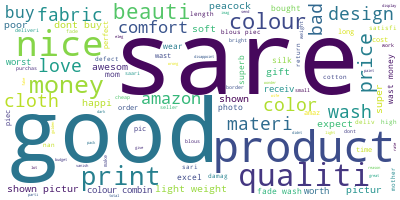

In [31]:
word_cloud = WordCloud(background_color="white").generate(text)
word_cloud.to_image()

From the word cloud it is clear that most of the review we have are positive

In [32]:
for val in tfidf_df.columns:
    if val in pos_words:
        count = 0
        for i in range(0,419):
            if(tfidf_df[val][i]>0):
                count=count+1
        print("weightage of word "+str(val)+" is: "+str(count))
    

weightage of word amaz is: 6
weightage of word appreci is: 1
weightage of word attract is: 1
weightage of word awesom is: 10
weightage of word awsom is: 1
weightage of word beauti is: 24
weightage of word beuti is: 2
weightage of word bright is: 4
weightage of word classi is: 1
weightage of word color is: 16
weightage of word come is: 1
weightage of word comfort is: 16
weightage of word compliment is: 1
weightage of word easi is: 1
weightage of word eleg is: 3
weightage of word excel is: 7
weightage of word fabul is: 2
weightage of word fantast is: 1
weightage of word fine is: 1
weightage of word genuin is: 1
weightage of word gift is: 10
weightage of word gold is: 1
weightage of word golden is: 3
weightage of word good is: 108
weightage of word gorgeou is: 2
weightage of word great is: 3
weightage of word happi is: 10
weightage of word impress is: 2
weightage of word kind is: 1
weightage of word law is: 1
weightage of word love is: 19
weightage of word lover is: 1
weightage of word ni